In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame()
N=20000

In [3]:
# generate features
feat = np.random.randn(N, 5)

(0.0, 20.0)

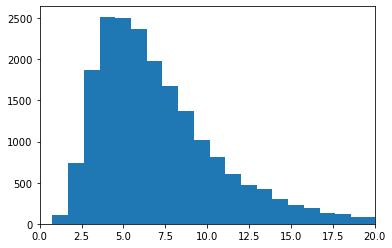

In [4]:
# survival_time
coef = np.abs(np.random.randn(1, 5))
survival_time = (np.exp(feat) * coef).sum(1)
plt.hist(survival_time, bins=100)
plt.xlim((0,20))

In [5]:
exam_t = np.random.rand(2, N) * 10
t1 = exam_t.min(axis=0)
t2 = exam_t.max(axis=0)

In [6]:
t1

array([2.53735299e+00, 4.58959124e+00, 3.47045632e-03, ...,
       1.39814468e+00, 1.92385939e+00, 6.70116883e+00])

In [7]:
t2

array([2.97434561, 6.52738435, 1.51285229, ..., 8.10766168, 1.93712368,
       8.75055315])

In [8]:
t2[t1>survival_time] = t1[t1>survival_time]
t1[t1>survival_time] = 0

In [9]:
t1[t2 < survival_time] = t2[t2 < survival_time]

In [10]:
e = (t2 > survival_time).astype(np.int32)

In [11]:
e.mean()

0.50285

In [12]:
df[['A', 'B', 'C', 'D', 'E']] = feat

In [13]:
df['t1'] = t1
df['t2'] = t2
df['e'] = e
df['gt'] = survival_time

In [14]:
train = df.sample(frac=0.8)
test = df.drop(train.index)
train.to_csv('train.csv')
test.to_csv('test.csv')